# The zero-lift angle of a finite wing

Before we start, this code sets the style of the notebook.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./style/nbstyle.css', 'r').read()
    return HTML(styles)
css_styling()

We will use the Python language to work out our examples, so we set up some Python tools first.

In [2]:
# load libraries and set plot parameters
import math
import numpy as np
import tables as pt

from sympy import *

from IPython.display import display, Math, Latex

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

## The wing zero-lift angle $\alpha_{0L}$

We call $\alpha_{0L}$ the zero-lift angle of a wing. If the free-stream velocity has an angle $\alpha_{\mathrm{W}}=\alpha_{0L}$ with respect to the wing root chord then the lift is zero: $C_L = 0$.

The zero-lift angle of attack is given by the following formula:

\begin{equation}
%\label{eq:AlphaZeroLift}
\alpha_{0L} 
  = \frac{2}{S} \int_0^{b/2} 
    \left[\alpha_{0\ell}(y) - \epsilon_{\mathrm{g}}(y)\right]
    c(y) \, \mathrm{d}y
\end{equation}

where $y$ is the generic coordinate along the wing span, $\alpha_{0\ell}(y)$ is the zero-lift angle of attack of the local airfoil at section, $\epsilon_{\mathrm{g}}(y)$ is the local section incidence with respect to the wing root chord, and $c(y)$ is the local chord.

## Numerical example

Let us consider an example where we calculate $\alpha_{0L} $ using the Python programming language. Let us assign the wing planform shape, i.e. let us assume given values of wing span $b$, root chord $c_{\mathrm{r}}$ and tip chord $c_{\mathrm{t}}$.

In Python we define the following variables:

In [3]:
c_r = 1.0; c_t = 0.5; b = 6.5

We will assume that all quantities in our calculations are expressed in SI units.

In [4]:
display(Math(r'\text{root chord:}\quad c_{\mathrm{r}} = '+ str(c_r) +'\,\mathrm{m}'))
display(Math(r'\text{tip chord:}\quad c_{\mathrm{t}} = '+ str(c_t) +'\,\mathrm{m}'))
display(Math(r'\text{span:}\quad b = '+ str(b) +'\,\mathrm{m}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Assuming a zero quarter-chord line sweep angle, $\Lambda_{c/4}=0$, we can now draw the top view of the wing:

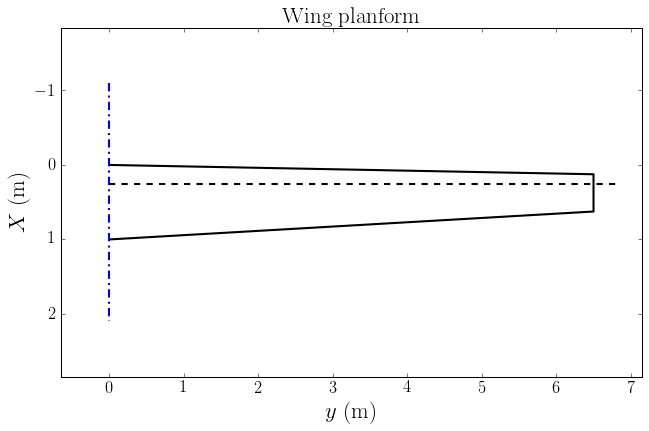

In [5]:
xLineWing = [0,b,b,0]
yLineWing = [0,0.25*c_r-0.25*c_t,0.25*c_r+0.75*c_t,c_r]

# planform
lineWing, = plt.plot(xLineWing, yLineWing, 'k-')
# centerline
centerLine, = plt.plot([0,0], [-1.1*c_r,2.1*c_r], 'b')
centerLine.set_dashes([8, 4, 2, 4]) 
# c/4 line
quarterChordLine, = plt.plot([0,1.05*b], [0.25*c_r,0.25*c_r], 'k--')

plt.axis('equal')
plt.axis([-0.1*b, 1.1*b, -0.1*c_r, 1.1*c_r])
plt.gca().invert_yaxis()
plt.title('Wing planform', fontsize=22)
plt.xlabel('$y$ (m)', fontsize=22)
plt.ylabel('$X$ (m)', fontsize=22)
plt.show()

We can calculate now some geometric data depending on the assigned shape.
The following code is self-explanatory:

In [6]:
S = (c_r + c_t)*b/2
taper_ratio = c_t/c_r
AR = b*b/S
print("Taper ratio: {0}\nWing area: {1} m^2\nAspect ratio: {2}".format(taper_ratio,S,AR))

Taper ratio: 0.5
Wing area: 4.875 m^2
Aspect ratio: 8.666666666666666


The reference wing area, given by the formula
\begin{equation}
%\label{eq:WingSurface}
S=( c_{\mathrm{r}} + c_{\mathrm{t}} )\,\frac{1}{2} b
\end{equation}

becomes

In [7]:
display(Math(r'\text{surface:}\quad S = '+ '{0:.4}'.format(S) +'\,\mathrm{m}^2'))

<IPython.core.display.Math object>

The taper ratio

\begin{equation}
%\label{eq:TaperRatio}
\lambda = \frac{ c_{\mathrm{t}} }{ c_{\mathrm{r}} }
\end{equation}

becomes

In [8]:
display(Math(r'\text{taper ratio:}\quad \lambda = '+ '{0:.3}'.format(taper_ratio)))

<IPython.core.display.Math object>

The aspect ratio

\begin{equation}
%\label{eq:AspectRatio}
\text{AR} = \frac{ b^2 }{ S }
\end{equation}

becomes

In [9]:
display(Math(r'\text{aspect ratio:}\quad \text{AR} = '+ '{0:.4}'.format(AR)))

<IPython.core.display.Math object>

### The law of the chords

The function $c(y)$ is the linear law that gives the chord at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
%\label{eq:ChordsLaw}
c(y) = A_c \, y + B_c
\end{equation}

with 

\begin{equation}
%\label{eq:ChordsLawAB}
A_c = \frac{2}{b} \left( c_{\mathrm{t}} - c_{\mathrm{r}} \right)
  \;\;,\qquad 
  B_c = c_{\mathrm{r}}
\end{equation}

The following code calculates the above two coefficients:



In [10]:
A_c = 2*(c_t - c_r)/b; B_c = c_r;
print("A_c: {0}\nB_c: {1} m".format(A_c,B_c))

A_c: -0.15384615384615385
B_c: 1.0 m


and the function $c(y)$ becomes:

In [11]:
display(Math(r'c(y) =\,' + '{0:.3}'.format(A_c) + '\,y + ' + '{0:.3}'.format(B_c) + r'\,\text{m}'))

<IPython.core.display.Math object>

If we integrate the law $c(y)$ over the span we have again the value of $S$:

\begin{equation}
2 \int_0^{b/2} c(y) \, \text{d}y = 2 \int_0^{b/2} \Big( A_c \, y + B_c \Big) \, \text{d}y = S
\end{equation}


In Python we can use the SymPy package that provides functions for symbolic calculus. The following code defines `y` as the symbolic variable and calculates the required functions.

In [12]:
# symbolic variable
y = Symbol('y')
# symbolic integral
c_law_integral_indefinite = integrate(A_c*y + B_c,y)
# definite integrale
c_law_integral_definite = 2*integrate(A_c*y + B_c,(y,0,b/2))

print('S = ' + '{0}'.format(c_law_integral_definite))

S = 4.87500000000000


The full workflow is the following:

In [13]:
c_law_integral_indefinite_latex = latex(c_law_integral_indefinite)
display(
    Math(
        r'S = 2 \int_0^{' + '{0:.3}'.format(b/2) + '}' 
        + r'\Big(' 
        +   r'{0:.4}'.format(A_c) + r'\, y + ' + '{0:.4}'.format(B_c) + r'\,\text{m}'
        + r'\Big)\,\text{d}y =' 
        + r'2 \big(' 
        +   c_law_integral_indefinite_latex 
        + r'\big)\Bigr|_0^{' + '{0:.4}'.format(b/2) + r'} \,\text{m}^2'
        + '=' + '{0:.4}'.format(c_law_integral_definite) + r'\,\text{m}^2'
    ))

<IPython.core.display.Math object>

### The law $\epsilon_{\mathrm{g}}(y)$ of the geometric twists

The function $\epsilon_{\mathrm{g}}(y)$ is the law that gives the geometric twist of the wing section at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. We assume a linear form

\begin{equation}
\epsilon_{\mathrm{g}}(y) = A_{\epsilon} \, y + B_{\epsilon}
\end{equation}

with 

\begin{equation}
%\label{eq:ChordsLawAB}
A_{\epsilon} = \frac{2}{b} \big( \epsilon_{\mathrm{g,t}} - \epsilon_{\mathrm{g,r}} \big)
  \;\;,\qquad 
  B_{\epsilon} = 0 \, \text{rad}
\end{equation}

Recall that, by definition, the geometric twist of the root section is zero.

The following code assigns a negative twist at the wing tip and calculates the above two coefficients:

In [14]:
eps_tip = -3.0*math.pi/180
A_eps = 2*eps_tip/b; B_eps = 0;
print("A_eps: {0} rad/m\nB_eps: {1} rad".format(A_eps,B_eps))

A_eps: -0.016110731556870733 rad/m
B_eps: 0 rad


and the function $\epsilon_{\mathrm{g}}(y)$ becomes:

In [15]:
display(Math(r'\epsilon_{\mathrm{g}}(y) =\,' + '{0:.3}'.format(A_eps) + r'\frac{\text{rad}}{\text{m}}\,y'))

<IPython.core.display.Math object>

### The law $\alpha_{0\ell}(y)$ of profile zero-lift angles

The function $\alpha_{0\ell}(y)$ gives the zero-lift angle of attack of the wing profile at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. We assume the followinh linear form

\begin{equation}
\alpha_{0\ell}(y) = A_{\alpha} \, y + B_{\alpha}
\end{equation}

with 

\begin{equation}
A_{\alpha} = \frac{2}{b} \left( \alpha_{0\ell\mathrm{t}} - \alpha_{0\ell\mathrm{r}} \right)
  \;\;,\qquad 
B_{\alpha} = \alpha_{0\ell\mathrm{r}}
\end{equation}

The following code assigns the two required values at root and tip sections and calculates the above two coefficients:

In [16]:
alpha0l_root = -2.5*math.pi/180
alpha0l_tip = -2.0*math.pi/180
A_alpha = 2*(alpha0l_tip - alpha0l_root)/b; 
B_alpha = alpha0l_root;
print("A_alpha: {0} rad/m\nB_eps: {1} rad".format(A_alpha,B_alpha))

A_alpha: 0.002685121926145122 rad/m
B_eps: -0.04363323129985824 rad


### Calculating the $\alpha_{0L}$

To be continued ...